# Convolutions

Objectives:
- Application of convolution on images

### Reading and opening images

The following code enables to read an image, put it in a numpy array and display it in the notebook.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

sample image shape:  (600, 600, 3)


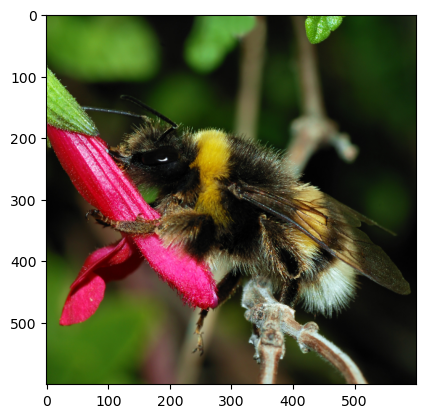

In [3]:
sample_image = imread("bumblebee.png")
sample_image= sample_image.astype("float32")

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

### A simple convolution filter

The goal of this section to use tensorflow / Keras to perform individual convolutions on images. This section does not involve training any model yet.

In [4]:
import tensorflow as tf
print(tf.__version__)

2023-03-08 10:45:35.953383: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [6]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
              input_shape=(None, None, 3))

Remember: in Keras, `None` is used as a marker for tensor dimensions with dynamic size. In this case `batch_size`, `width` and `height` are all dynamic: they can depend on the input. Only the number of input channels (3 colors) has been fixed.

In [7]:
sample_image.shape

(600, 600, 3)

In [8]:
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 600, 600, 3)

**Questions**: 


If we apply this convolution to this image, what will be the shape of the generated feature map?

Hints:

- in Keras `padding="same"` means that convolutions uses as much padding as necessary so has to preserve the spatial dimension of the input maps or image;

- in Keras, convolutions have no strides by default.

Bonus: how much padding Keras has to use to preserve the spatial dimensions in this particular case?

In [9]:
img_out = conv(img_in)
print(type(img_out), img_out.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 600, 600, 3)


2023-03-08 10:45:40.594758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The output is a tensorflow Eager Tensor, which can be converted to obtain a standard numpy array:

In [10]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))

<class 'numpy.ndarray'>


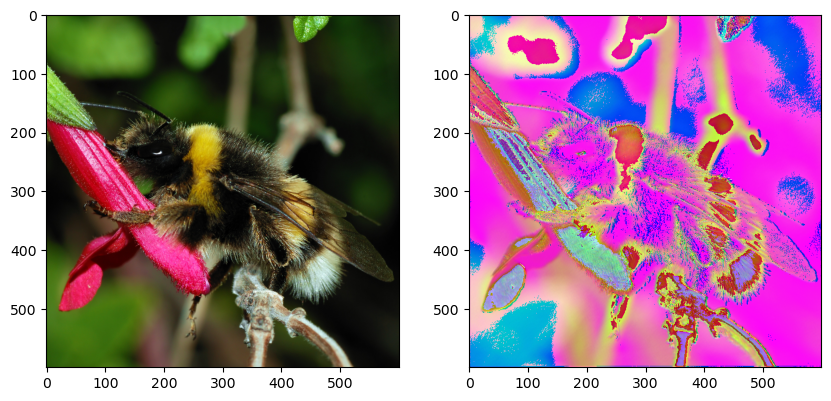

In [11]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

The output has 3 channels, hence can also be interpreted as an RGB image with matplotlib. However it is the result of a random convolutional filter applied to the original one.


Let's look at the parameters:

In [12]:
conv.count_params()

228

**Question**: can you compute the number of trainable parameters from the layer hyperparameters?

Hints:

- the input image has 3 colors and a single **convolution kernel** mixes information from all the three input channels to compute its output;

- a **convolutional layer** outputs many channels at once: each channel is the output of a distinct convolution operation (aka unit) of the layer;

- do not forget the biases!

In [13]:
(5*5*3+1)*3

228

Solution: let's introspect the keras model:

In [14]:
len(conv.get_weights())

2

In [15]:
weights = conv.get_weights()[0]
weights.shape

(5, 5, 3, 3)

Eeach of the 3 output channels is generated by a distinct convolution kernel.

Each convolution kernel has a spatial size of 5x5 and operates across 3 input channels.

In [16]:
biases = conv.get_weights()[1]
biases.shape

(3,)

One bias per output channel.

We can instead build a kernel ourselves, by defining a function which will be passed to `Conv2D` Layer.
We'll create an array with 1/25 for filters, with each channel seperated. 

In [17]:
def my_init(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

We can display the numpy filters by moving the spatial dimensions in the end (using `np.transpose`):

In [18]:
np.transpose(my_init(), (2, 3, 0, 1))

array([[[[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
      

In [19]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_init)

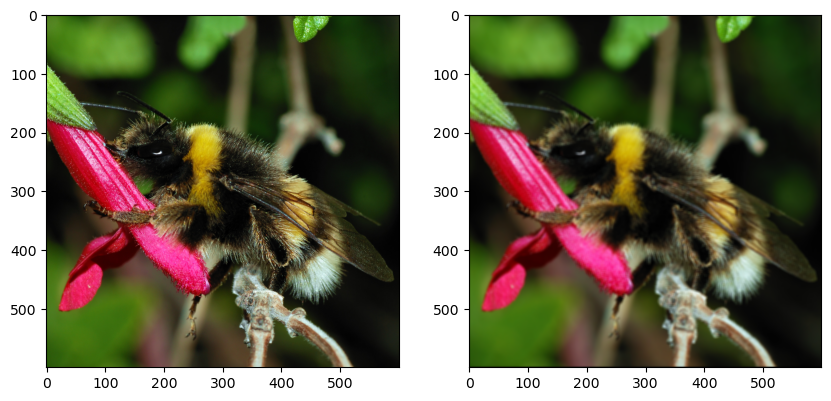

In [20]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

**Exercise**
- Define a Conv2D layer with 3 filters (5x5) that compute the identity function (preserve the input image without mixing the colors).
- Change the stride to 2. What is the size of the output image?
- Change the padding to 'VALID'. What do you observe?

TensorShape([1, 298, 298, 3])

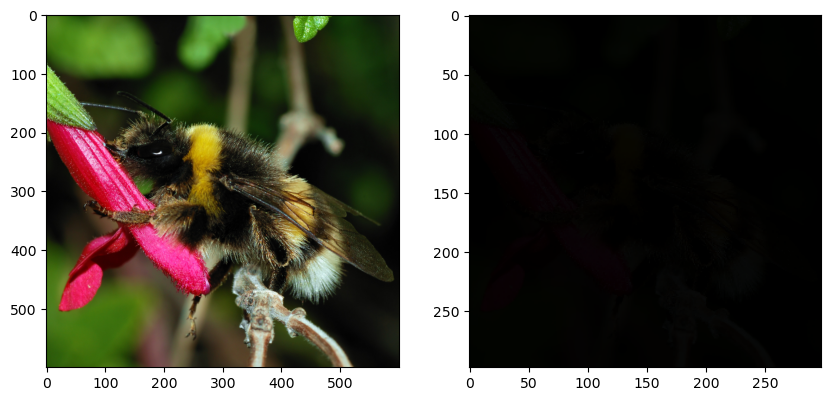

In [26]:
def my_init(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[3, 3, 0, 0] = 1 / 25
    array[3, 3, 1, 1] = 1 / 25
    array[3, 3, 2, 2] = 1 / 25
    return array

conv = Conv2D(filters=3, kernel_size=(5, 5), padding="VALID",
           input_shape=(None, None, 3), strides=(2, 2), kernel_initializer=my_init)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));
img_out.shape

Shape of original image: (600, 600, 3)
Shape of result with SAME padding: (300, 300, 3)
Shape of result with VALID padding: (298, 298, 3)


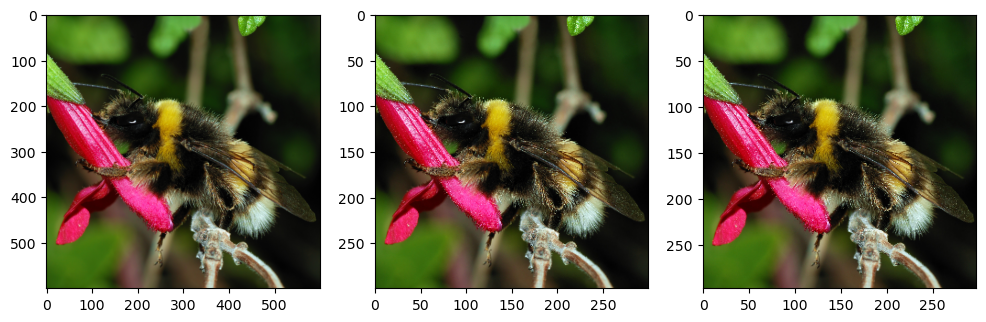

In [28]:
# %load solutions/strides_padding.py
def my_init(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[2, 2] = np.eye(3)
    return array


conv_strides_same = Conv2D(filters=3, kernel_size=5, strides=2,
           padding="same", kernel_initializer=my_init,
           input_shape=(None, None, 3))

conv_strides_valid = Conv2D(filters=3, kernel_size=5, strides=2,
           padding="valid", kernel_initializer=my_init,
           input_shape=(None, None, 3))

img_in = np.expand_dims(sample_image, 0)
img_out_same = conv_strides_same(img_in)[0].numpy()
img_out_valid = conv_strides_valid(img_in)[0].numpy()

print("Shape of original image:", sample_image.shape)
print("Shape of result with SAME padding:", img_out_same.shape)
print("Shape of result with VALID padding:", img_out_valid.shape)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 4))
ax0.imshow(img_in[0].astype(np.uint8))
ax1.imshow(img_out_same.astype(np.uint8))
ax2.imshow(img_out_valid.astype(np.uint8))

# We observe that the stride divided the size of the image by 2
# In the case of 'VALID' padding mode, no padding is added, so
# the size of the ouput image is actually 2 less because of the
# kernel size


### Working on edge detection on Grayscale image

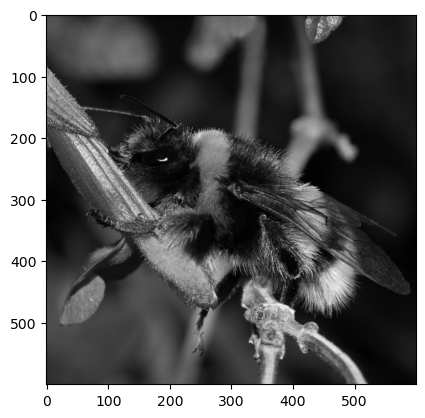

In [25]:
# convert image to greyscale
grey_sample_image = sample_image.mean(axis=2)

# add the channel dimension even if it's only one channel so
# as to be consistent with Keras expectations.
grey_sample_image = grey_sample_image[:, :, np.newaxis]


# matplotlib does not like the extra dim for the color channel
# when plotting gray-level images. Let's use squeeze:
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

**Exercise**
- Build an edge detector using `Conv2D` on greyscale image
- You may experiment with several kernels to find a way to detect edges
- https://en.wikipedia.org/wiki/Kernel_(image_processing)

Try `Conv2D?` or press `shift-tab` to get the documentation. You may get help at https://keras.io/layers/convolutional/

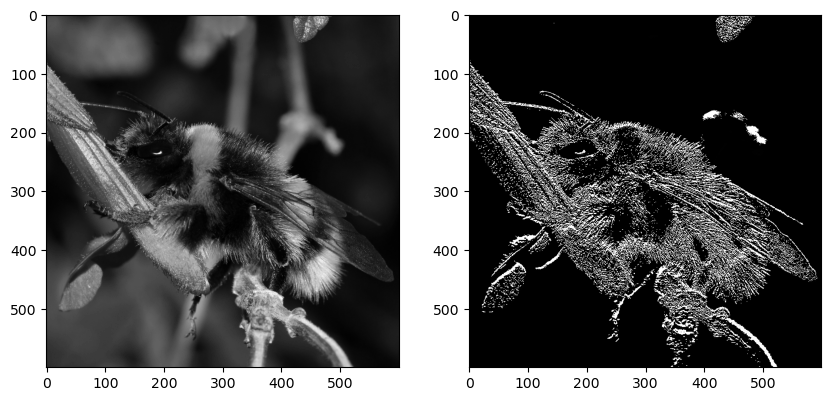

In [30]:
# %load solutions/edge_detection
def my_init(shape, dtype=None):
    array = np.array([
        [0.0,  0.2, 0.0],
        [0.0, -0.2, 0.0],
        [0.0,  0.0, 0.0],
    ], dtype="float32")
    # adds two axis to match the required shape (3,3,1,1)
    return np.expand_dims(np.expand_dims(array,-1),-1)


conv_edge = Conv2D(kernel_size=(3,3), filters=1,
           padding="same", kernel_initializer=my_init,
           input_shape=(None, None, 1))

img_in = np.expand_dims(grey_sample_image, 0)
img_out = conv_edge(img_in).numpy()

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(np.squeeze(img_in[0]).astype(np.uint8),
           cmap=plt.cm.gray);
ax1.imshow(np.squeeze(img_out[0]).astype(np.uint8),
           cmap=plt.cm.gray);

# We only showcase a vertical edge detection here.
# Many other kernels work, for example differences
# of centered gaussians (sometimes called mexican-hat
# connectivity)
#
# You may try with this filter as well
# np.array([
#         [ 0.1,  0.2,  0.1],
#         [ 0.0,  0.0,  0.0],
#         [-0.1, -0.2, -0.1],
#     ], dtype="float32")


### Pooling and strides with convolutions

**Exercise**
- Use `MaxPool2D` to apply a 2x2 max pool with strides 2 to the image. What is the impact on the shape of the image?
- Use `AvgPool2D` to apply an average pooling.
- Is it possible to compute a max pooling and an average pooling with well chosen kernels?

**Bonus**
- Implement a 3x3 average pooling with a regular convolution `Conv2D`, with well chosen strides, kernel and padding

In [34]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

input shape: (1, 600, 600, 3)
output shape: (1, 300, 300, 3)


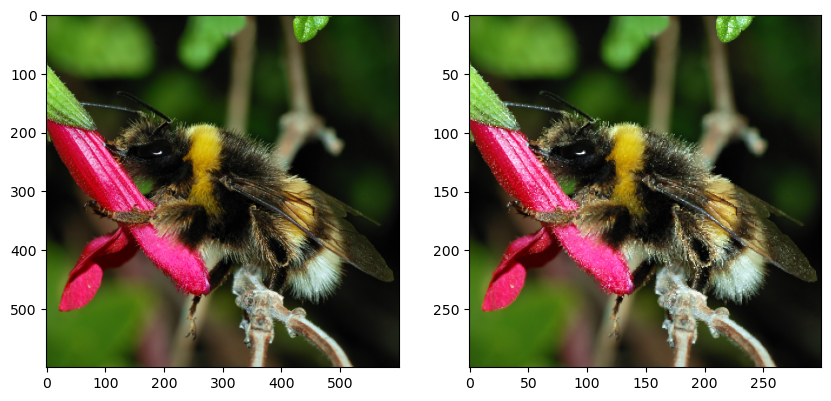

In [35]:
# %load solutions/pooling.py
max_pool = MaxPool2D(2, strides=2, input_shape=(None, None, 3))
img_in = np.expand_dims(sample_image, 0)
img_out = max_pool(img_in).numpy()

print("input shape:", img_in.shape)
print("output shape:", img_out.shape)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out[0].astype('uint8'));

# it is not possible to build a max pooling with a regular convolution
# however it is possible to build average pooling with well  
# chosen strides and kernel


In [36]:
# %load solutions/average_as_conv.py
avg_pool = AvgPool2D(3, strides=3, input_shape=(None, None, 3))

img_in = np.expand_dims(sample_image, 0)
img_out_avg_pool = avg_pool(img_in).numpy()

# Same operation implemented with a convolution

def my_init(shape=(3, 3, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 9.
    array[:, :, 1, 1] = 1 / 9.
    array[:, :, 2, 2] = 1 / 9.
    return array

# padding="valid" means no padding.
# In our case we don't need padding:
# See formula: w' = (w - k + 2 * p) / s + 1
# With k=3, s=3, and p=0, the output volume w' is
# w' = w / 3
conv_avg = Conv2D(kernel_size=3, filters=3, strides=3,
           padding="valid", kernel_initializer=my_init,
           input_shape=(None, None, 3))

img_out_conv = conv_avg(np.expand_dims(sample_image, 0)).numpy()

print("input shape:", img_in.shape)
print("output avg pool shape:", img_out_avg_pool.shape)
print("output conv shape:", img_out_conv.shape)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out_avg_pool[0].astype('uint8'))
ax2.imshow(img_out_conv[0].astype('uint8'));

# Note that the numerical computation/approximation might
# be slightly different in the two cases
print("Avg pool is similar to Conv ? -", np.allclose(img_out_avg_pool, img_out_conv))
